In [2]:
import nltk
import numpy as np
import pandas as pd

mydata=pd.read_csv('b.csv')

In [3]:
mydata.head()

,Review,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Everything from the weather,staff,food,property,fire pits,décor,spa,rooms and beach were top notch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"The hotel it is fantastic built by the sea, li...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One dream! Cozy and comfortable Hotel! The b...,since reception to the end of the stay! We we...,as I have gluten aversion,NaN,all the employees already knew and were waiti...,we were received in the fire pits,with some wine and all the guests were invite...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hotel concept is hard to grasp. They communica...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,This is a wonderful hotel,for a romantic escape. Every room has a theme,and is incredible,overlooking the sea,the sustainable concept of the hotel is excel...,modern design,the staff and owners will make your stay memo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a=mydata['Review']

In [11]:
positive=0
negative=0
neutral=0
arr=[]
for corpus in a:
    corpus=corpus.lower()
    docs=corpus.split('\n')
    
    words=nltk.tokenize.word_tokenize(docs[0])
    allowed_tags=['VBP','VB','VBG','JJ','NN','RB']
    
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    from string import punctuation as punc
    
    pdocs=[]
    for d in docs:
        words=nltk.tokenize.word_tokenize(d)
        words_tags=nltk.pos_tag(words)
        
        for w,t in words_tags:
            if w in punc:
                words.remove(w)
            elif w in ENGLISH_STOP_WORDS:
                words.remove(w)
            elif t not in allowed_tags:
                words.remove(w)
        pd=' '.join(words)
        if pd=='':
            pdocs.append('empty')
        pdocs.append(pd)
    
    from sklearn.feature_extraction.text import CountVectorizer
    vec=CountVectorizer()
    matrix_X=vec.fit_transform(pdocs)
    
    #LDA TOPIC MODELLING
    features=vec.get_feature_names()
    from sklearn.decomposition import LatentDirichletAllocation
    lda=LatentDirichletAllocation(n_components=5)
    lda.fit(matrix_X)
    
    
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    sid=SentimentIntensityAnalyzer()
    
    print('ACTUAL REVIEW')
    print(corpus)
    print(''*100)
    for i in pdocs:
        
        ss=sid.polarity_scores(i)
        print('SUMMARY')
        print(i)
        print(''*100)
        for k in ss:
            print(k,ss[k])
        arr.append(ss['compound'])
        if(ss['compound']>=0.05):
            positive+=1
            print("Positive Sentiment")
        elif(ss['compound']<=-0.05):
            negative+=1
            print("negative Sentiment")
        else:
            neutral+=1
            print("Neutral Sentiment")
   
    print(''*100)
    print('KEYWORDS')
    for tid,topics in enumerate(lda.components_):
        top_words=[features[i] for i in topics.argsort()[:-10:-1]]
        print(top_words)
        
        
        
        break
    print('-'*100)
    
    

ACTUAL REVIEW
 everything from the weather

SUMMARY
weather

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['weather']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
the hotel it is fantastic built by the sea, living together with nature. environment it is great as well as people and service.
we full enjoyed the place, and facilities.
thanks for the "cidreira" and "madalenas" tea at reception

SUMMARY
hotel fantastic sea living nature environment great service

neg 0.0
neu 0.438
pos 0.562
compound 0.8271
Positive Sentiment
SUMMARY
place

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
cidreira tea reception

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['tea', 'reception', 'cidreira', 'place', 'service', 'sea', 'nature', 'living', 'hotel']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
one dream! co

ACTUAL REVIEW
     my co-workers loved this place and its service! congratulations! next time it will be really hard to find a place that could overcome this one!! some of them even ask if they decide to go on a personal weekend you could make a special price. one more time a big thank!        

SUMMARY
place service time really hard place overcome ask decide personal weekend make special price time big thank

neg 0.081
neu 0.67
pos 0.249
compound 0.5434
Positive Sentiment

KEYWORDS
['time', 'place', 'weekend', 'thank', 'special', 'service', 'really', 'price', 'personal']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 food very original and genuine

SUMMARY
food original genuine

neg 0.0
neu 0.465
pos 0.535
compound 0.3182
Positive Sentiment

KEYWORDS
['original', 'genuine', 'food']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 in the restaurant

SU

ACTUAL REVIEW
     congratulations to the amazing place

SUMMARY
amazing place

neg 0.0
neu 0.208
pos 0.792
compound 0.5859
Positive Sentiment

KEYWORDS
['place', 'amazing']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     from all eco-sustainable hotels we know, this one, is without any doubts, the best "eco", familiar, fitting perfectly in the nature, since food until the entire place itself. congratulations, and good luck.        

SUMMARY
eco-sustainable know eco familiar fitting perfectly nature food entire place good luck

neg 0.0
neu 0.471
pos 0.529
compound 0.8779
Positive Sentiment

KEYWORDS
['sustainable', 'place', 'perfectly', 'nature', 'luck', 'know', 'good', 'food', 'fitting']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     dear all of you! now we are sitting here at your beautiful place, having our last breakfast (…for now…) and we

ACTUAL REVIEW
     what a wonderful place

SUMMARY
wonderful place

neg 0.0
neu 0.213
pos 0.787
compound 0.5719
Positive Sentiment

KEYWORDS
['wonderful', 'place']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     thanks so much for the lovely experience!        

SUMMARY
lovely experience

neg 0.0
neu 0.208
pos 0.792
compound 0.5859
Positive Sentiment

KEYWORDS
['lovely', 'experience']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     what a wonderful place - we've had an amazing and very relaxing stay. loved the tree room

SUMMARY
wonderful place 've amazing relaxing stay tree room

neg 0.0
neu 0.318
pos 0.682
compound 0.8934
Positive Sentiment

KEYWORDS
['wonderful', 've', 'tree', 'stay', 'room', 'relaxing', 'place', 'amazing']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 we 

----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
      since princess olive to floral corners full of aromas and music…few words for a moment as good. enchanting       

SUMMARY
princess floral aromas music…few moment good enchanting

neg 0.0
neu 0.674
pos 0.326
compound 0.4404
Positive Sentiment

KEYWORDS
['princess', 'music', 'moment', 'good', 'floral', 'few', 'enchanting', 'aromas']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     we will come back        

SUMMARY
come

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['come']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     every wedding anniversary we want to stay here! the best spot in portugal!        

SUMMARY
wedding anniversary want stay spot portugal

neg 0.0
neu 0.794
pos 0.206
compound 0.0772
Positive 

ACTUAL REVIEW
     first of all

SUMMARY
empty

neg 1.0
neu 0.0
pos 0.0
compound -0.2023
negative Sentiment
SUMMARY


neg 0.0
neu 0.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['empty']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     i’ve been glad to stay at your "hotel". we feel very comfortable and had a great time. 
our room was so nice. and the bathroom, perfect (we liked the nice bathrooms…).
landscape from the room is beautiful.
breakfast is amazing.
i preferred to test a « little » address and miguel advised us very well. 
be sure i’ll be glad to talk about areas do seixo to our clients. 
kind regards,        

SUMMARY
’ ve glad stay hotel feel comfortable great time

neg 0.0
neu 0.325
pos 0.675
compound 0.886
Positive Sentiment
SUMMARY
room nice bathroom perfect nice bathrooms…

neg 0.0
neu 0.244
pos 0.756
compound 0.8519
Positive Sentiment
SUMMARY
landscape room beautiful

neg 0.0
neu 0.339
pos 0.6

ACTUAL REVIEW
      it is good to watch this kind of projects implemented in portugal. to reinforce our character and strength. congratulations.       

SUMMARY
good watch kind portugal reinforce character strength

neg 0.0
neu 0.296
pos 0.704
compound 0.8591
Positive Sentiment

KEYWORDS
['watch', 'strength', 'reinforce', 'portugal', 'kind', 'good', 'character']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     fantastic stay

SUMMARY
fantastic stay

neg 0.0
neu 0.217
pos 0.783
compound 0.5574
Positive Sentiment

KEYWORDS
['stay', 'fantastic']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     exceeded expectations

SUMMARY
empty

neg 1.0
neu 0.0
pos 0.0
compound -0.2023
negative Sentiment
SUMMARY


neg 0.0
neu 0.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['empty']
-----------------------------------------------------------------------------

ACTUAL REVIEW
 we were 3 and we all ordered the tasting menu. the menu was excellent, and chef leonard has to be congregated.       
last sunday i went with some friends to have lunch at your hotel restaurant.
unfortunately, the same can not be said of your waitress. after we ordered the tasting menu, i asked him if there was (apart from the choices of the letter), any proposal for the food pairing menu. he told me that yes, that was a proposal tailored to each menu (since vary with some frequency), among whites, reds and dessert. when i asked what the price per person of this option, informed me that would be € 25 (per person).
we were served several wines by the glass during the meal (2 white, 2 red and 1 dessert). the food pairing went better in some than in other dishes, and we had the opportunity to discuss with the waitress how challenging some of the dishes were.
so far so good.
the problem, and it's always unfortunate when this happens, when we emerged shows the account (you ca

ACTUAL REVIEW
     we posted a review on tripadvisor.  we had a great stay and absolutely loved the place.  thank you to the whole staff for treating us so well.  everybody was fantastic to us.  on our way home to nyc we spoke with an english couple about your hotel and they were already looking it up and planning when they can go!  obrigado        

SUMMARY
review tripadvisor great stay absolutely place thank staff treating everybody fantastic way home nyc english couple hotel looking planning obrigado

neg 0.0
neu 0.619
pos 0.381
compound 0.888
Positive Sentiment

KEYWORDS
['way', 'tripadvisor', 'couple', 'english', 'everybody', 'fantastic', 'great', 'home', 'hotel']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     congratulations to areas do seixo

SUMMARY
seixo

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['seixo']
-----------------------------------------------------------------------------

neu 0.0
pos 1.0
compound 0.7906
Positive Sentiment

KEYWORDS
['true', 'love']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 thank you for originality

SUMMARY
thank originality

neg 0.0
neu 0.286
pos 0.714
compound 0.3612
Positive Sentiment

KEYWORDS
['originality', 'thank']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     is a magical experience you have created a paradise with all the elements of love

SUMMARY
magical experience paradise love

neg 0.0
neu 0.192
pos 0.808
compound 0.8555
Positive Sentiment

KEYWORDS
['paradise', 'magical', 'love', 'experience']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 inventive and delicious cuisine   wonderful marta's massage i enjoyed everything here: the beauty of places

SUMMARY
inventive delicious cuisine wonderful marta massage beaut

pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['time']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     we had a very very lovely stay! the architecture of the hotel is exceptional

SUMMARY
lovely stay architecture hotel exceptional

neg 0.0
neu 0.513
pos 0.487
compound 0.5859
Positive Sentiment

KEYWORDS
['stay', 'lovely', 'hotel', 'exceptional', 'architecture']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 food and drinks are exceptional!!    this was a very amazing stay - so relaxing and everyone was so nice and treat us like family. we will definitely be back!!         

SUMMARY
food exceptional amazing stay relaxing nice treat family definitely

neg 0.0
neu 0.208
pos 0.792
compound 0.9349
Positive Sentiment

KEYWORDS
['treat', 'stay', 'relaxing', 'nice', 'food', 'family', 'exceptional', 'definitely', 'amazing']
----------------------------

pos 0.608
compound 0.4767
Positive Sentiment

KEYWORDS
['evening', 'really', 'impressed', 'yesterday', 'restaurant', 'place', 'gorgeous']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     we've also had a fantastic stay at your hotel and found the style

SUMMARY
've fantastic stay hotel style

neg 0.0
neu 0.526
pos 0.474
compound 0.5574
Positive Sentiment

KEYWORDS
['ve', 'style', 'stay', 'hotel', 'fantastic']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     dear friends,
we wanted to send a short email to thank you for our fantastic stay- it was beyond amazing and we were so happy to be there for our engagement! 
sean and i were particularly honored to be included in the owners dinner at the private wine cellar. it was so interesting to see the cellar and such a special time to interact with the owner himself! we are so thankful for this hospital

compound 0.7147
Positive Sentiment

KEYWORDS
['place', 'little', 'heaven', 'friendly', 'bit']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     in love with this place        

SUMMARY
love place

neg 0.0
neu 0.192
pos 0.808
compound 0.6369
Positive Sentiment

KEYWORDS
['place', 'love']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     this was the perfect place to spend our honeymoon. feels like paradise. peaceful

SUMMARY
perfect place spend honeymoon paradise peaceful

neg 0.0
neu 0.213
pos 0.787
compound 0.9022
Positive Sentiment

KEYWORDS
['spend', 'place', 'perfect', 'peaceful', 'paradise', 'honeymoon']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     what a special place! thank you so much to all the staff specially joana. you've made this a perfect end to our honeymoon. 

SUMMARY
sourdough recipe

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
honestly hotel absolutely amazing tripadvisor ago food let truly spectacular really just incredible

neg 0.0
neu 0.5
pos 0.5
compound 0.8748
Positive Sentiment
SUMMARY
thing complaint want feedback tiny cutlery uncomfortable hold

neg 0.432
neu 0.45
pos 0.117
compound -0.5423
negative Sentiment

KEYWORDS
['sourdough', 'recipe', 'want', 'tiny', 'thing', 'complaint', 'cutlery', 'feedback', 'uncomfortable']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
dear  daniella. just back home after a very nice roundtrip in north and central portugal.   we specially want to thank you for our  fantastic stay in your hotel.  
next time we really hope to stay longer in santa cruz beach.
we appreciate the perfect reception upon our arrival and also your kindly and lovely smile!
after travelling the world round  finally we discovered that  heaven  e

ACTUAL REVIEW
     thank you joana, 
i had a wonderful stay at the hotel (i didn't want to leave). 
here are few pictures that i took         

SUMMARY
thank joana

neg 0.0
neu 0.286
pos 0.714
compound 0.3612
Positive Sentiment
SUMMARY
wonderful stay hotel n't want leave

neg 0.135
neu 0.331
pos 0.535
compound 0.5612
Positive Sentiment
SUMMARY
empty

neg 1.0
neu 0.0
pos 0.0
compound -0.2023
negative Sentiment
SUMMARY


neg 0.0
neu 0.0
pos 0.0
compound 0.0
Neutral Sentiment

KEYWORDS
['empty', 'thank', 'joana', 'wonderful', 'want', 'stay', 'leave', 'hotel']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     dear areas do seixo,
my husband and i stayed with you in the 7 sentidos room on 15 june. we had such a lovely time! we loved everything, from the room, the facilities, the food, the friendly staff to your spa treatments. we had a fantastic experience. we are looking forward to coming back for another visit next year

ACTUAL REVIEW
we spend nice moment to areas do seixo.
we were for about 12 days on villa 2.
we found really nice:
- the hotel and the garden, specially the vegetable garden.
- the walk to go to the beach and the beautiful beach.
- the team is really friendly, also the cook and the cleaning ladies .
- the delicious breakfast, the wonderful salads and sandwiches at lunch and also the fantastic diner.anyway, we keep a really nice memory of our stay by you.    we found not nice:
-the price of vegetarian menu ( for diner) is to expensive.
-the vegetarian main course looks some times more as a starter than a main course.

  we found not nice:
-the price of vegetarian menu ( for diner) is to expensive.
-the vegetarian main course looks some times more as a starter than a main course.
-the outside table and chairs at our villa are faded (near the barbecue) 
   

SUMMARY
spend nice moment

neg 0.0
neu 0.417
pos 0.583
compound 0.4215
Positive Sentiment
SUMMARY
villa

neg 0.0
neu 1.0
pos 0.0
comp

Positive Sentiment
SUMMARY
facing sea

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
time portugal ’ t tell amazing trip

neg 0.0
neu 0.513
pos 0.487
compound 0.5859
Positive Sentiment
SUMMARY
travel asia europe usa year london confidently say ’ ve

neg 0.0
neu 0.721
pos 0.279
compound 0.4767
Positive Sentiment
SUMMARY
staff receptionist kitchen staff house extremely personal friendly smiley helpful

neg 0.0
neu 0.431
pos 0.569
compound 0.8497
Positive Sentiment
SUMMARY
villa design cleanness villa second soft new bedlinen white crisp homely duvet

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
design villa practical beautiful decorating style inspirational using kitchen bbq facility kitchen immaculate didn t trace facility

neg 0.0
neu 0.66
pos 0.34
compound 0.802
Positive Sentiment
SUMMARY
garden natural veg garden staff picking kitchen kindly herbs bbq villa box garden grateful happy

neg 0.0
neu 0.47
pos 0.53
compound 0.9081
Positive Sentiment
SUMMA

neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
new beach bar noah just minute stroll beach wonderful addition perfect place

neg 0.0
neu 0.575
pos 0.425
compound 0.8126
Positive Sentiment
SUMMARY
great work guys n't away

neg 0.0
neu 0.494
pos 0.506
compound 0.6249
Positive Sentiment
SUMMARY
love

neg 0.0
neu 0.0
pos 1.0
compound 0.6369
Positive Sentiment

KEYWORDS
['beach', 'bar', 'wonderful', 'perfect', 'just', 'place', 'minute', 'new', 'noah']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     areas do seixo is truly special and you will realize it in every little aspect from the moment you enter.
the architecture of the whole resort is modern yet personal and functional. every little corner is designed with much love and attention to detail. the lighting at night provides a nice romantic atmosphere. 
our room (#5) was very spacious with a big bath tub, a great chimney and an open bath room as the main high

ACTUAL REVIEW
     after 3 days in the center of lisbon, we escaped the baking heat and after a hour-long uber ride arrived here.
first impressions count and the place is stunning.
every aspect of the hotel, the productive fields, is presented beautifully. from the concrete walls to the piped music, the hotel oozes quiet confidence - it is the most perfect place to relax.        

SUMMARY
center lisbon baking heat hour-long uber ride

neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
SUMMARY
count place stunning

neg 0.0
neu 0.435
pos 0.565
compound 0.3818
Positive Sentiment
SUMMARY
aspect hotel productive beautifully concrete piped music hotel quiet confidence perfect place relax

neg 0.0
neu 0.398
pos 0.602
compound 0.9274
Positive Sentiment

KEYWORDS
['place', 'count', 'stunning', 'uber', 'long', 'baking', 'center', 'heat', 'hour']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     the most amazing time there.

ACTUAL REVIEW
     it is with great pleasure that i write these lines. this place was recommended to me by my son (sergio godinho), which in about two weeks, spent the honeymoon in this hotel. welcoming; bold; very intimate, and an intimate connection with nature, the detail of the connection with wood is one of the predominant materials. all very well balanced. as service ... very informal and familiar . we feel surrounded by friends. a thank you to "joanas"; gilberto; filipe; sergio; lucas and a special to my friend "carina" ... for us the "face" of the hotel. by the way you live the moment and absorb the whole experience of this magnificent place. one thank you to the whole team.        

SUMMARY
great pleasure write place son godinho honeymoon hotel welcoming intimate intimate connection nature connection wood predominant service informal familiar feel thank joanas gilberto filipe sergio lucas special friend carina face hotel way live moment absorb experience magnificent place than


KEYWORDS
['experience', 'excellent']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     thank you

SUMMARY
thank

neg 0.0
neu 0.0
pos 1.0
compound 0.3612
Positive Sentiment

KEYWORDS
['thank']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     goodbye to all my friends. no words can explain how wonderful this lovely place is!!! all our love        

SUMMARY
goodbye explain wonderful lovely place love

neg 0.0
neu 0.204
pos 0.796
compound 0.9136
Positive Sentiment

KEYWORDS
['wonderful', 'place', 'lovely', 'love', 'goodbye', 'explain']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     thank you for a very delightful stay        

SUMMARY
thank delightful stay

neg 0.0
neu 0.137
pos 0.863
compound 0.743
Positive Sentiment

KEYWORDS
['thank', 'stay', 'delightful']
-------------------

pos 0.843
compound 0.8934
Positive Sentiment

KEYWORDS
['stay', 'loving', 'fantastic', 'dedication', 'care']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     a wonderful week in "7 senses" room. we enjoyed it with all senses. thank you for the wonderful week.        

SUMMARY
wonderful week room thank wonderful week

neg 0.0
neu 0.233
pos 0.767
compound 0.872
Positive Sentiment

KEYWORDS
['thank', 'room', 'wonderful', 'week']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
     this hotel is amazing!  thank you         

SUMMARY
hotel amazing thank

neg 0.0
neu 0.137
pos 0.863
compound 0.743
Positive Sentiment

KEYWORDS
['thank', 'hotel', 'amazing']
----------------------------------------------------------------------------------------------------
ACTUAL REVIEW
 the food is a marvelous experience

SUMMARY
food marvelous experience

neg 0.0
neu 0.339

In [12]:
print(positive,neutral,negative)

482 148 54


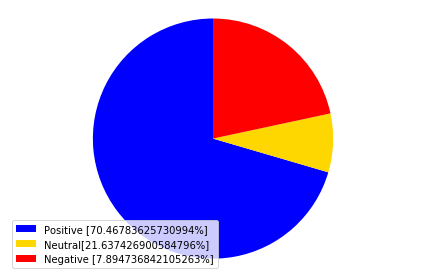

In [14]:
import matplotlib.pyplot as plt
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100

labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

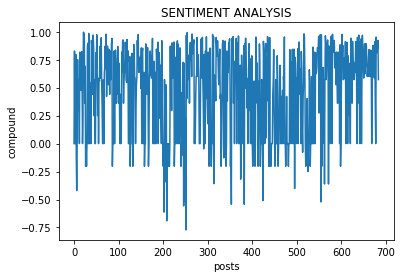

In [15]:
plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')

plt.show()